In [6]:
library(Seurat)
library(dplyr)
library(patchwork)
library(readr)
library(ggplot2)
library(qs)
library(ggsci)
library(ggpubr)

In [7]:
# 加载绘图函数
source("./source_R/custom_seurat_functions.R")
if(T){
  text.size = 12
  text.angle = 45
  text.hjust = 1
  legend.position = "right"
  mytheme <- theme(plot.title = element_text(size = text.size+2,color="black",hjust = 0.5),
                   axis.ticks = element_line(color = "black"),
                   axis.title = element_text(size = text.size,color ="black"), 
                   axis.text = element_text(size=text.size,color = "black"),
                   axis.text.x = element_text(angle = text.angle, hjust = text.hjust ), #,vjust = 0.5
                   panel.grid=element_blank(), # 去网格线
                   legend.position = legend.position,
                   legend.text = element_text(size= text.size),
                   legend.title= element_text(size= text.size)
  )
}

### Step1.读入数据

In [8]:
### 1.读入数据
seurat.data = qread(file = "./Outdata/Step3.Cluster_annotion.qs")
seurat.data

An object of class Seurat 
34329 features across 61700 samples within 1 assay 
Active assay: RNA (34329 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, umap, harmony

In [9]:
table(seurat.data$sampleID)


GSM8504078 GSM8504079 GSM8504080 GSM8504081 GSM8504082 GSM8504083 GSM8863170 
      5894       7636       7254       8769       8217       9551       6347 
GSM8863172 
      8032 

In [10]:
table(seurat.data$group)


  ALI   CRL 
34569 27131 

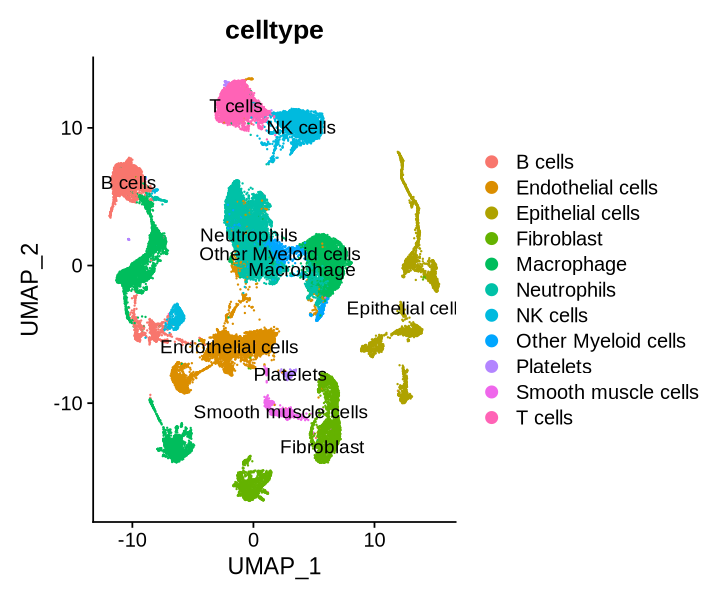

In [11]:
#UMAP降维可视化
options(repr.plot.width = 6, repr.plot.height = 5)
p1 = DimPlot(seurat.data, 
        reduction = "umap",
        group.by = "celltype",
        label = T);p1

### Step2.统计细胞比例

In [12]:
table(seurat.data$sampleID, seurat.data$group)

            
              ALI  CRL
  GSM8504078    0 5894
  GSM8504079    0 7636
  GSM8504080    0 7254
  GSM8504081 8769    0
  GSM8504082 8217    0
  GSM8504083 9551    0
  GSM8863170    0 6347
  GSM8863172 8032    0

In [13]:
table(seurat.data$celltype)


            B cells   Endothelial cells    Epithelial cells          Fibroblast 
               6010                6353                4365                6096 
         Macrophage         Neutrophils            NK cells Other Myeloid cells 
              13125               11206                5380                1375 
          Platelets Smooth muscle cells             T cells 
                533                 890                6367 

In [18]:
library(paletteer)

Using cluster as id variables



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


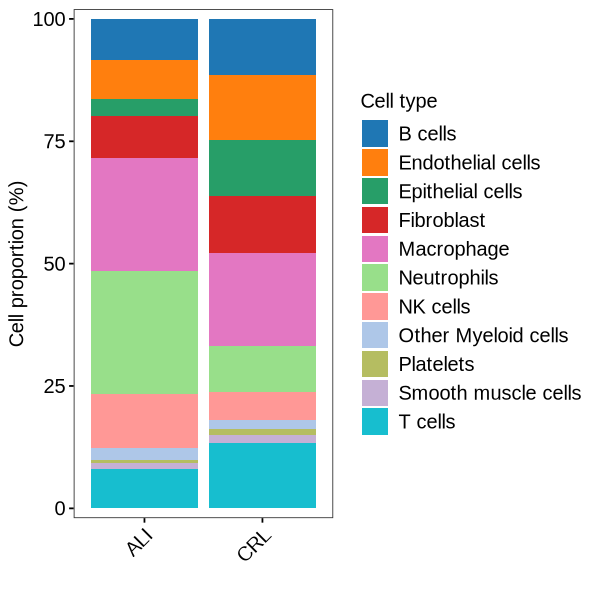

In [19]:
#### 2.1 百分比柱状图
## 配色 
color.use=c('B cells'='#1f77b4', 'Endothelial cells'='#ff7f0e','Epithelial cells'= '#279e68', 'Fibroblast'='#d62728', 
            # 'DCs'='#aa40fc', 'Erythroid cells'='#8c564b', 'Mast cells'='#e377c2', 
            'Platelets'= '#b5bd61', 'T cells'='#17becf','Macrophage'='#e377c2', 
            'Neutrophils'= '#98df8a','NK cells'='#ff9896', 'Smooth muscle cells'= '#c5b0d5','Other Myeloid cells'='#aec7e8')
## 按分组
options(repr.plot.width = 5, repr.plot.height = 5)
p1 = plot.clusters.group(data = seurat.data,
                         Group = "group",
                         legend.position = "none",
                         celltype.id = "celltype",
                         widths = c(2,1),
                         log = F,
                         text.size = 12,
                         order = F,
                         legend.title = "Cell type",
                         color = 1,
                         xlab = "",
                         cell.counts = F)&mytheme&
    scale_fill_manual(values = color.use);p1

Using cluster as id variables



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


pdf 
  2

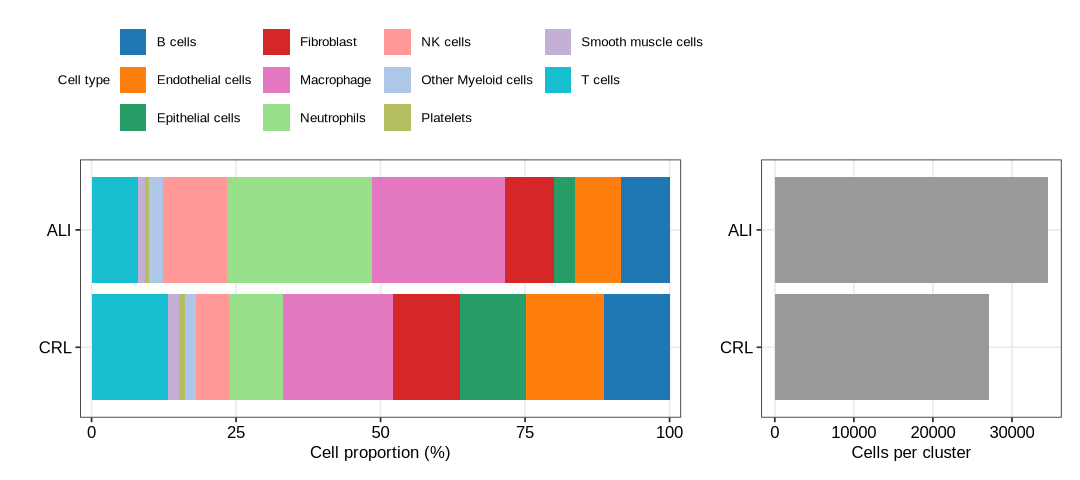

In [20]:
## 按分组 + 细胞数量统计
options(repr.plot.width = 9, repr.plot.height = 4)
p2 = plot.clusters.group(data = seurat.data,
                         Group = "group",
                         legend.position = "top",
                         celltype.id = "celltype",
                         widths = c(2,1),
                         log = F,
                         text.size = 12,
                         order = T,
                         legend.title = "Cell type",
                         color = 1,
                         xlab = "",
                         cell.counts = T)& 
    scale_fill_manual(values = color.use);p2
pdf(file="frequency_CRL_ALI.pdf", width=9, height=4)
print(p2)
dev.off()

Using cluster as id variables



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


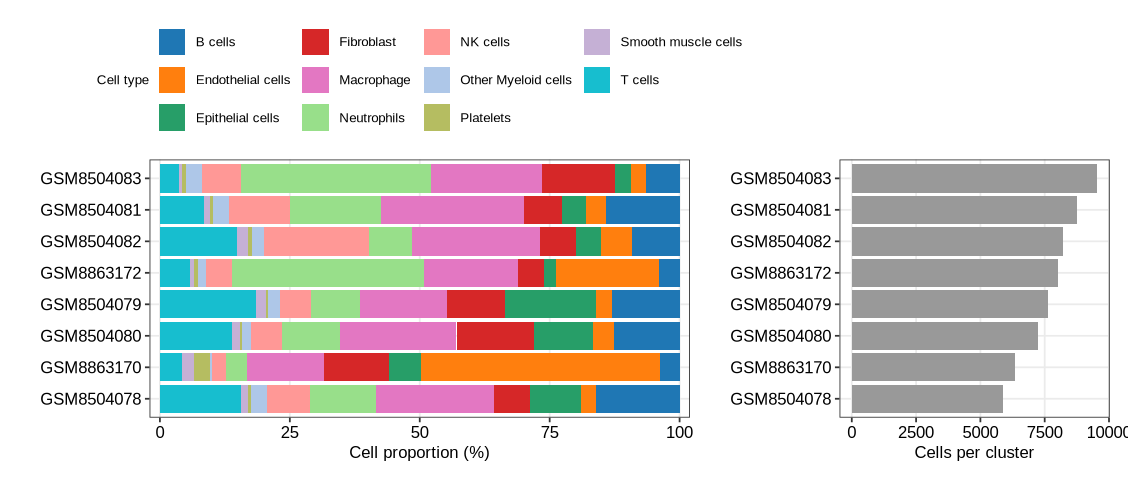

In [21]:
## 按样本 + 细胞数量统计
options(repr.plot.width = 9.4, repr.plot.height = 4)
p3 = plot.clusters.group(data = seurat.data,
                         Group = "sampleID",
                         legend.position = "top",
                         celltype.id = "celltype",
                         widths = c(2,1),
                         log = F,
                         text.size = 12,
                         order = T,
                         legend.title = "Cell type",
                         color = 1,
                         xlab = "",
                         cell.counts = T)& 
    scale_fill_manual(values = color.use);p3

In [22]:
pdf(file="frequency_SampleID.pdf", width=9.4, height=4)
print(p3)
dev.off()

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


pdf 
  2

In [24]:
#### 2.2 箱式图
meta.data = read_rds("./Rawdata/test_data.rds")
head(meta.data)
group.color = c("P" = "#e75945","N" = "#f39b7f","T" = "#00a087","L" = "#BC3C29FF")
# N：正常样本，P：癌旁样本，T：肿瘤样本

stype,cancerType,patient.uid,meta.cluster,loc
<chr>,<chr>,<chr>,<fct>,<chr>
CD8,BRCA,BRCA.ElhamAzizi2018.10X.BC9,CD8.c12.Tex.CXCL13,T
CD8,BRCA,BRCA.ElhamAzizi2018.10X.BC9,CD8.c01.Tn.MAL,T
CD8,BRCA,BRCA.ElhamAzizi2018.10X.BC9,CD8.c10.Trm.ZNF683,T
CD8,BRCA,BRCA.ElhamAzizi2018.10X.BC9,CD8.c07.Temra.CX3CR1,T
CD8,BRCA,BRCA.ElhamAzizi2018.10X.BC9,CD8.c02.Tm.IL7R,T
CD8,BRCA,BRCA.ElhamAzizi2018.10X.BC9,CD8.c06.Tem.GZMK,T


In [25]:
dim(meta.data)

[1] 397810      5

In [26]:
table(meta.data$loc)


     L      N      P      T 
   898  86763  26673 283476 

In [27]:
table(meta.data$stype)


   CD4    CD8 
163260 234550 

In [28]:
### （可选）这里选择CD8T亚群进行可视化，这里的loc的L分组作者原文是不进行画图展示的，因此过滤掉
dat.plot = filter(as.data.frame(meta.data),stype == "CD8"&loc != c("L"))
dat.plot$loc = factor(dat.plot$loc,levels = c("P","N","T"))

In [ ]:
#meta.data = seurat.data@meta.data

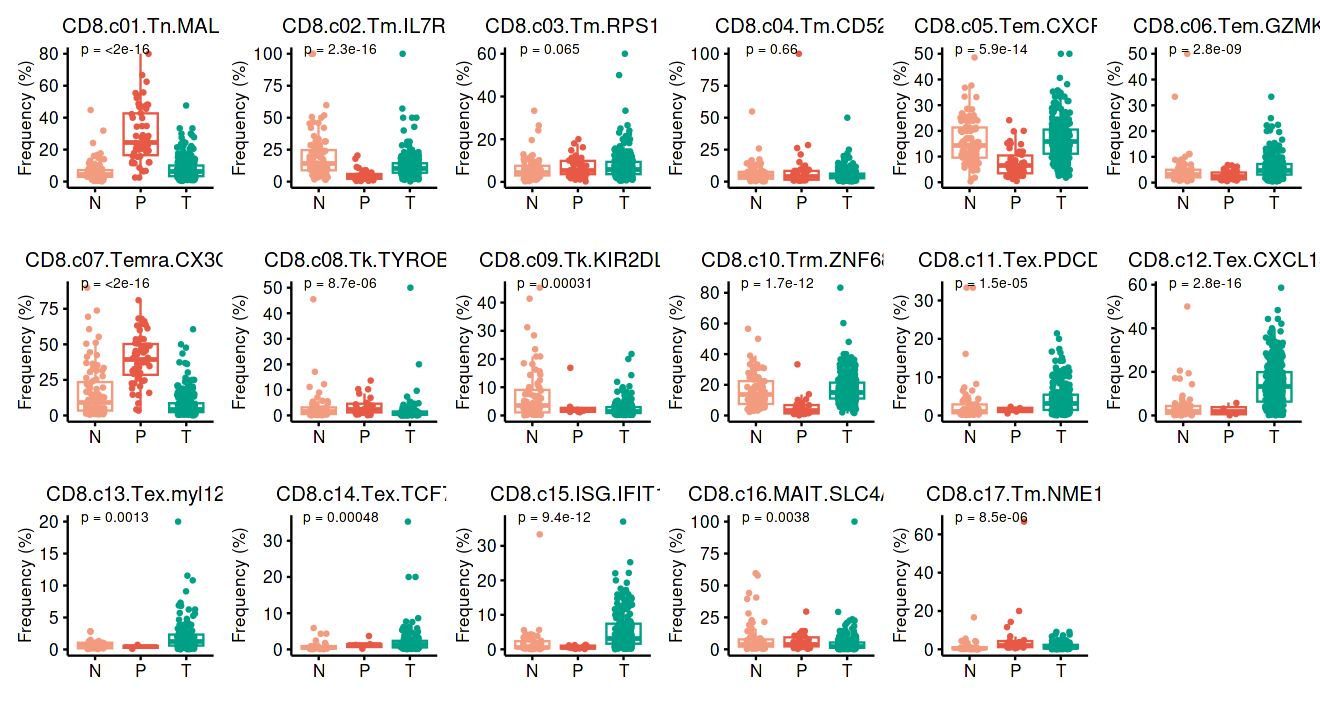

In [29]:
options(repr.plot.width = 11, repr.plot.height = 6)
p4 = scCellBoxplot(meta.data = dat.plot, 
              sampleID ="patient.uid",
              group = "loc", 
              celltype = "meta.cluster",
              filter.cutoff = 0, 
              p.method = "kruskal.test",
              p.label="p.format",
              p.size = 2.8,
              ncol = 6,
              text.size = 10)&
      scale_color_manual(values=group.color)&
      scale_fill_manual(values=group.color);p4

Loading required package: ggthemes

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggthemes’”
Warning message in plot.time.point(celltype = dat.plot$meta.cluster, group = dat.plot$loc, :
“Input data including the three variables, method of Xiaoming will be performed!”
Joining with `by = join_by(SampleID, Group)`


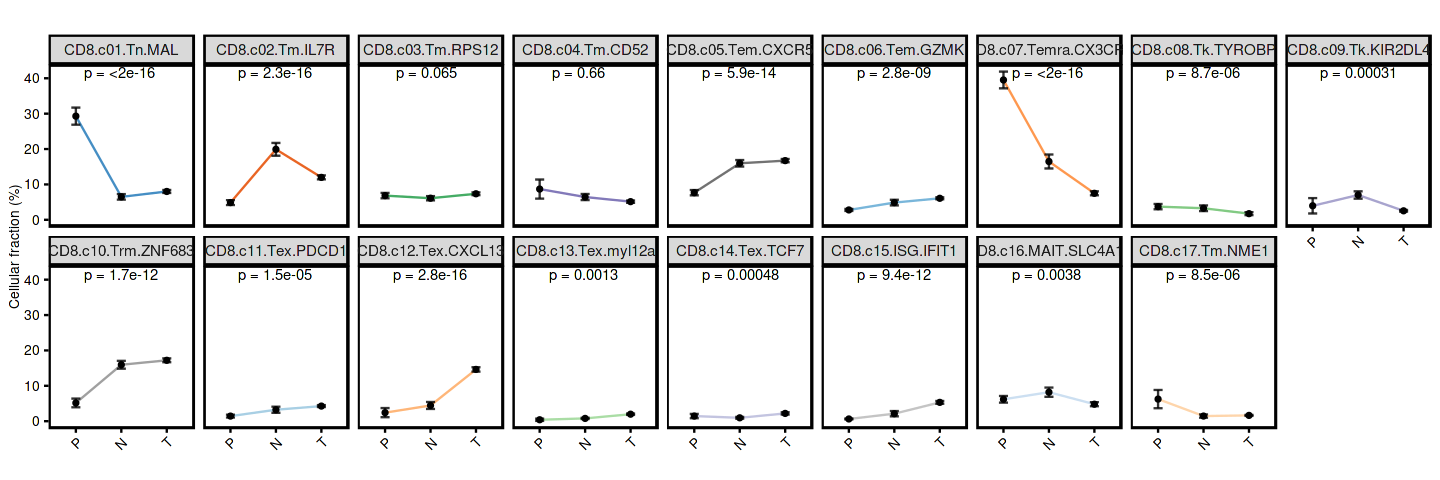

In [30]:
#### 2.3 折线图/柱状图
options(repr.plot.width = 12, repr.plot.height = 4)
p5 = plot.time.point(celltype = dat.plot$meta.cluster,
                     group = dat.plot$loc,
                     sampleID = dat.plot$patient.uid,
                     barplot = F,
                     lineplot = T,
                     legend.title="Cell type",
                     ylab= "Cellular fraction (%)",
                     xlab ="",
                     plot.title = "",
                     label.y = 40,
                     label.size = 3,
                     my.test.method = "kruskal.test",
                     error.bar = "sem",
                     text.size = 8,
                     text.angle = 45,
                     text.hjust = 1,ncol = 9,
                     label.dot = F,
                     legend.position = "none");p5

Loading required package: ggthemes

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggthemes’”
Warning message in plot.time.point(celltype = dat.plot$meta.cluster, group = dat.plot$loc, :
“Input data including the three variables, method of Xiaoming will be performed!”
Joining with `by = join_by(SampleID, Group)`


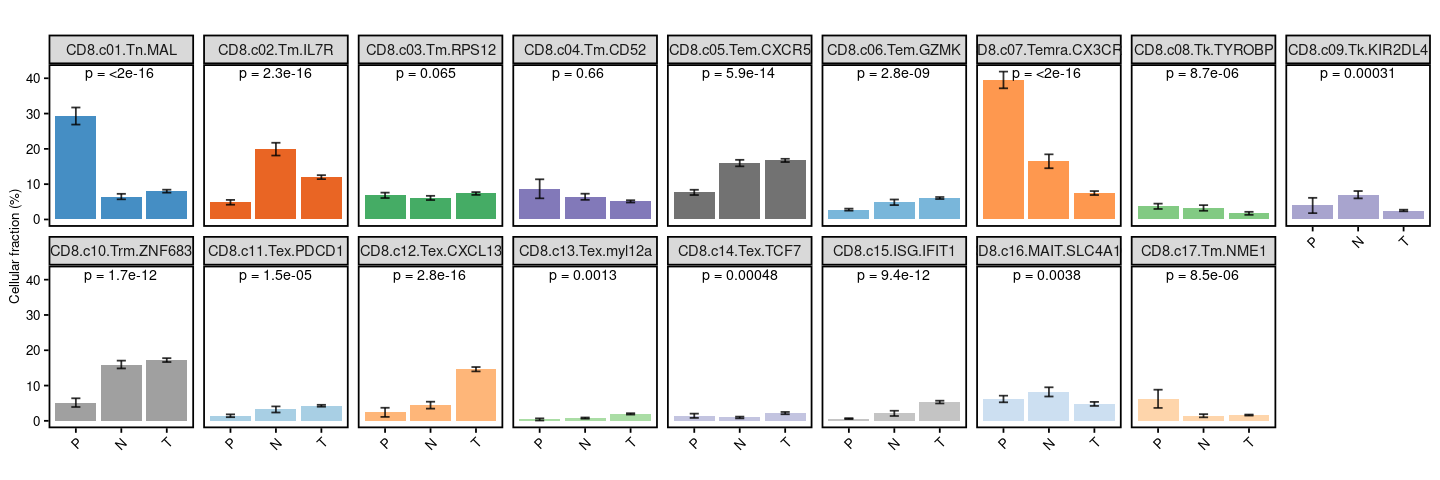

In [180]:
p6 = plot.time.point(celltype = dat.plot$meta.cluster,
                     group = dat.plot$loc,
                     sampleID = dat.plot$patient.uid,
                     barplot = T,
                     lineplot = F,
                     legend.title="Cell type",
                     ylab= "Cellular fraction (%)",
                     xlab ="",
                     plot.title = "",
                     label.y = 40,
                     label.size = 3,
                     my.test.method = "kruskal.test",
                     error.bar = "sem",
                     text.size = 8,
                     text.angle = 45,
                     text.hjust = 1,ncol = 9,
                     label.dot = F,
                     legend.position = "none");p6

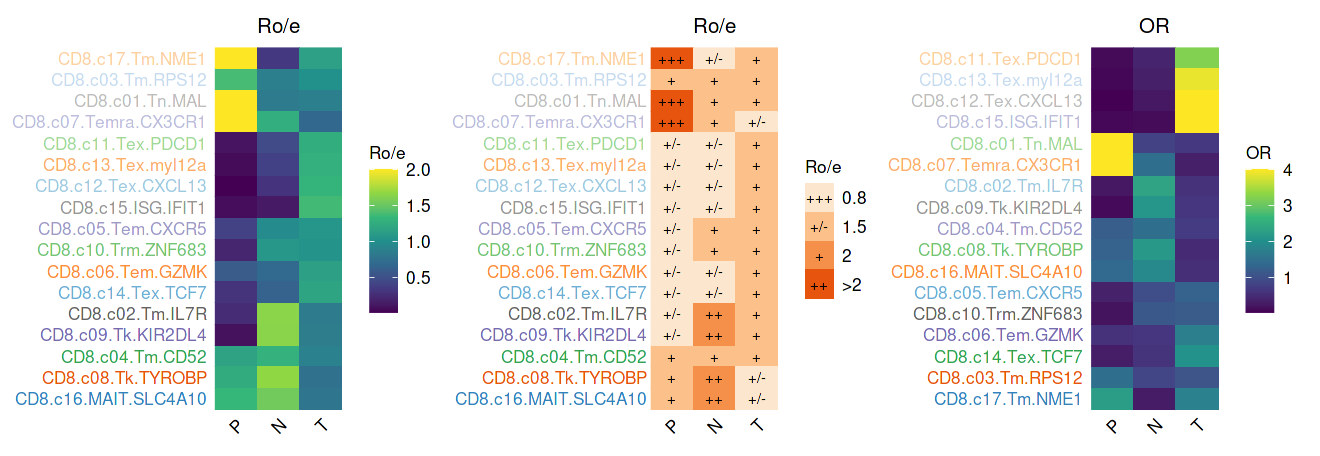

In [33]:
options(repr.plot.width = 11, repr.plot.height = 3.8)
p7 = gg.tissueDist(cellInfo.tb = dat.plot,
                   meta.cluster = dat.plot$meta.cluster,
                   colname.patient = "patient.uid",
                   loc = dat.plot$loc,
                   cuts =c(0.0000000, 0.0000001, 0.8, 1.5, 2, Inf),
                   bin.label = c("-", "+/-", "+", "++", "+++"),
                   verbose = 1,
                   z.hi.OR = 4,
                   z.hi.ROE = 2,
                   text.size = 10,
                   text_color = paletteer::paletteer_d('ggsci::category20c_d3')
)
#ggsave(filename = "./Outplot/Step5.Roe_OR_heatmap.pdf", 
#       height = 10, width = 20, units = "cm")

In [ ]:
### End